## HW7 作業 B0829011 王紹丞

* 加入中文註解
* 並更改模型參數
* 因原本使用的是Linux指令去下載data，才能使用的code以更正
* **要注意每個電腦跑的path會不太一樣，並且無法重複建立分割的cats_vs_dogs_small的資料夾**

**Instantiating a small convnet**

線上面是3層的Conv的網路，基本上都會搭配一個pooling，壓縮圖片並保留特徵
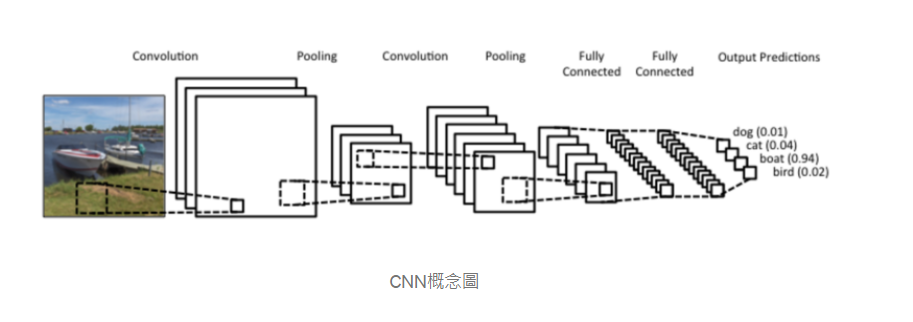
線下面是為了把3維的張量轉為1維的張，才繼續training
使用maxpooling 
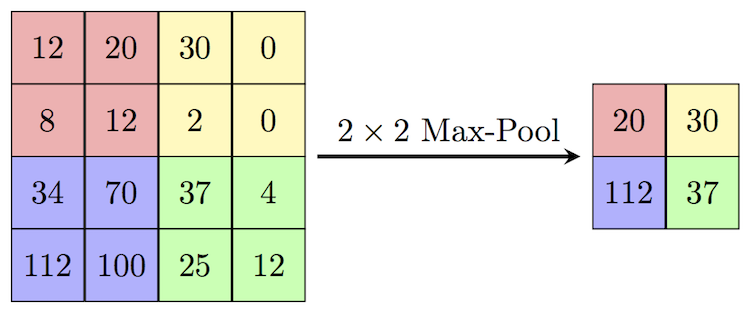

In [1]:
from tensorflow import keras
from tensorflow.keras import layers
inputs = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)

#---------------------------------------------------------------------------------------------------------

x = layers.Flatten()(x)
outputs = layers.Dense(10, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

**Displaying the model's summary**

In [2]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 128)         73856 

**Training the convnet on MNIST images**

In [3]:
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype("float32") / 255
model.compile(optimizer="rmsprop",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"])
model.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
938/938 [==============================] - 18s 19ms/step - loss: 0.1544 - accuracy: 0.9523
Epoch 2/5
938/938 [==============================] - 17s 18ms/step - loss: 0.0450 - accuracy: 0.9860
Epoch 3/5
938/938 [==============================] - 18s 19ms/step - loss: 0.0316 - accuracy: 0.9904
Epoch 4/5
938/938 [==============================] - 20s 21ms/step - loss: 0.0231 - accuracy: 0.9929
Epoch 5/5
938/938 [==============================] - 19s 20ms/step - loss: 0.0182 - accuracy: 0.9945


**Evaluating the convnet**

In [4]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc:.3f}")

313/313 [==============================] - 1s 3ms/step - loss: 0.0292 - accuracy: 0.9906
Test accuracy: 0.991


### The convolution operation

#### Understanding border effects and padding

#### Understanding convolution strides

### The max-pooling operation

**An incorrectly structured convnet missing its max-pooling layers**

In [5]:
inputs = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(10, activation="softmax")(x)
model_no_max_pool = keras.Model(inputs=inputs, outputs=outputs)

In [6]:
model_no_max_pool.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_4 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 conv2d_5 (Conv2D)           (None, 22, 22, 128)       73856     
                                                                 
 flatten_1 (Flatten)         (None, 61952)             0         
                                                                 
 dense_1 (Dense)             (None, 10)                619530    
                                                                 
Total params: 712,202
Trainable params: 712,202
Non-trainab

## Training a convnet from scratch on a small dataset

### The relevance of deep learning for small-data problems

### Downloading the data

termios provides an interface to the POSIX calls for tty I/O control.
url: https://docs.python.org/3/library/termios.html
windos沒辦法使用下面這個cell

In [12]:
# from google.colab import files
# files.upload()
# !mkdir ~/.kaggle
# !cp kaggle.json ~/.kaggle/
# !chmod 600 ~/.kaggle/kaggle.json
# !kaggle competitions download -c dogs-vs-cats
# !unzip -qq train.zip

我直接去kaggle上下載資料

**Copying images to training, validation, and test directories**

設定檔案路徑，pathlib可以使用 ' / '來串接目錄，而且自代操作目錄的方法
ref : https://medium.com/ai%E5%8F%8D%E6%96%97%E5%9F%8E/python-%E4%BD%BF%E7%94%A8pathlib%E6%9B%BF%E4%BB%A3os-path-%E8%BD%89%E9%8C%84-edc9defb2bd8

In [42]:
from pathlib import Path

In [44]:
Path.home()#查看自己的家目錄

WindowsPath('C:/Users/user')

In [48]:
p = pathlib.Path('/Users/user/Desktop')
p1= p/'deep-learning-with-python-notebooks-master (1)/dogs_vs_cats'
print(p1.exists())
p2 = p1/'train'
print(p2.is_dir())

True
True


In [53]:
import os, shutil, pathlib

original_dir = pathlib.Path(p1)
new_base_dir = pathlib.Path("cats_vs_dogs_small")

def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = p1/new_base_dir / subset_name / category
        os.makedirs(dir)
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=p2 / fname,
                            dst=dir / fname)

make_subset("train", start_index=0, end_index=1000)
make_subset("validation", start_index=1000, end_index=1500)
make_subset("test", start_index=1500, end_index=2500)

### Building the model

**Instantiating a small convnet for dogs vs. cats classification**

In [54]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [55]:
model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_16 (Conv2D)          (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 89, 89, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 43, 43, 64)       0         
 g2D)                                                      

**Configuring the model for training**

In [56]:
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

### Data preprocessing

**Using `image_dataset_from_directory` to read images**

In [60]:
mynew_dir=p/'deep-learning-with-python-notebooks-master (1)/dogs_vs_cats/cats_vs_dogs_small'

In [62]:
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    mynew_dir / "train",
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    mynew_dir / "validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    mynew_dir / "test",
    image_size=(180, 180),
    batch_size=32)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


In [63]:
import numpy as np
import tensorflow as tf
random_numbers = np.random.normal(size=(1000, 16))
dataset = tf.data.Dataset.from_tensor_slices(random_numbers)

In [64]:
for i, element in enumerate(dataset):
    print(element.shape)
    if i >= 2:
        break

(16,)
(16,)
(16,)


In [65]:
batched_dataset = dataset.batch(32)
for i, element in enumerate(batched_dataset):
    print(element.shape)
    if i >= 2:
        break

(32, 16)
(32, 16)
(32, 16)


In [66]:
reshaped_dataset = dataset.map(lambda x: tf.reshape(x, (4, 4)))
for i, element in enumerate(reshaped_dataset):
    print(element.shape)
    if i >= 2:
        break

(4, 4)
(4, 4)
(4, 4)


**Displaying the shapes of the data and labels yielded by the `Dataset`**

In [67]:
for data_batch, labels_batch in train_dataset:
    print("data batch shape:", data_batch.shape)
    print("labels batch shape:", labels_batch.shape)
    break

data batch shape: (32, 180, 180, 3)
labels batch shape: (32,)


**Fitting the model using a `Dataset`**

In [68]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
63/63 [==============================] - 42s 655ms/step - loss: 0.7065 - accuracy: 0.5095 - val_loss: 0.6839 - val_accuracy: 0.6470
Epoch 2/30
63/63 [==============================] - 40s 630ms/step - loss: 0.7024 - accuracy: 0.5650 - val_loss: 0.6762 - val_accuracy: 0.5460
Epoch 3/30
63/63 [==============================] - 40s 630ms/step - loss: 0.6819 - accuracy: 0.5845 - val_loss: 0.6538 - val_accuracy: 0.6300
Epoch 4/30
63/63 [==============================] - 41s 652ms/step - loss: 0.6438 - accuracy: 0.6355 - val_loss: 0.6359 - val_accuracy: 0.6370
Epoch 5/30
63/63 [==============================] - 40s 642ms/step - loss: 0.5930 - accuracy: 0.6980 - val_loss: 0.6058 - val_accuracy: 0.6350
Epoch 6/30
63/63 [==============================] - 41s 645ms/step - loss: 0.5422 - accuracy: 0.7290 - val_loss: 0.5836 - val_accuracy: 0.6920
Epoch 7/30
63/63 [==============================] - 40s 638ms/step - loss: 0.5014 - accuracy: 0.7555 - val_loss: 0.5786 - val_accuracy: 0.7290

**Displaying curves of loss and accuracy during training**

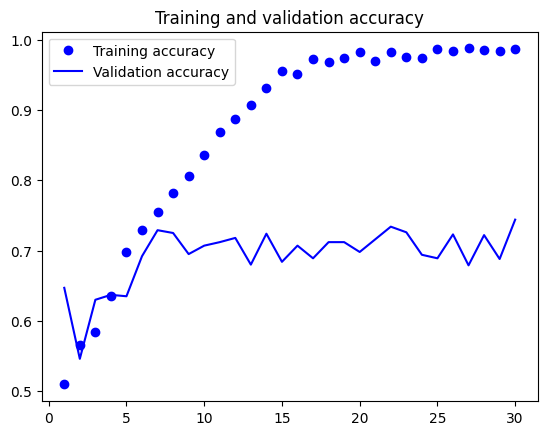

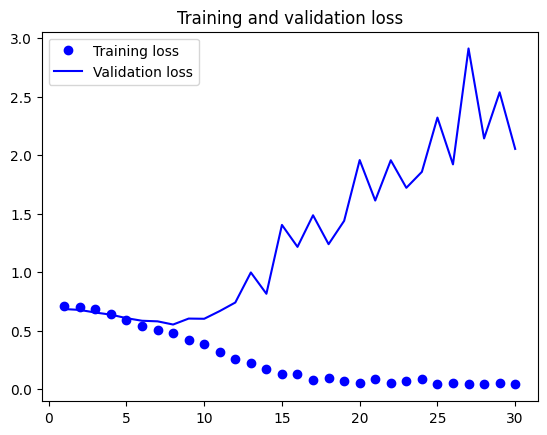

In [69]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

**Evaluating the model on the test set**

In [70]:
test_model = keras.models.load_model("convnet_from_scratch.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

63/63 [==============================] - 9s 140ms/step - loss: 0.5749 - accuracy: 0.7140
Test accuracy: 0.714


### Using data augmentation

**Define a data augmentation stage to add to an image model**

In [71]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

**Displaying some randomly augmented training images**

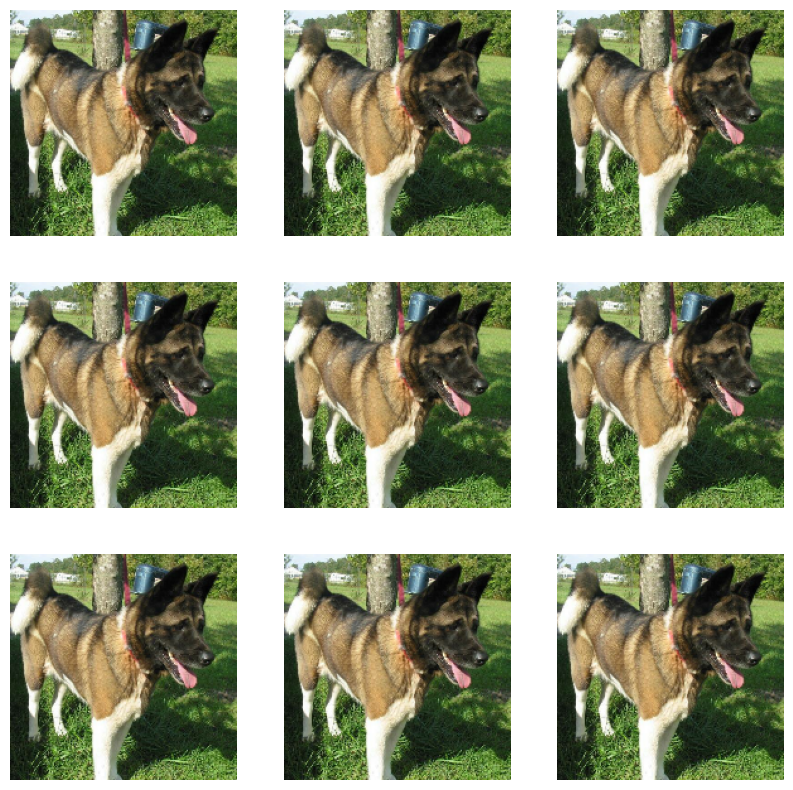

In [72]:
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

**Defining a new convnet that includes image augmentation and dropout**

In [73]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

**Training the regularized convnet**

In [75]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=10,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/10
63/63 [==============================] - 43s 684ms/step - loss: 0.6910 - accuracy: 0.5470 - val_loss: 0.9730 - val_accuracy: 0.5000
Epoch 2/10
63/63 [==============================] - 42s 671ms/step - loss: 0.7176 - accuracy: 0.5750 - val_loss: 0.7109 - val_accuracy: 0.5140
Epoch 3/10
63/63 [==============================] - 43s 678ms/step - loss: 0.6676 - accuracy: 0.6125 - val_loss: 0.6317 - val_accuracy: 0.6170
Epoch 4/10
63/63 [==============================] - 44s 691ms/step - loss: 0.6460 - accuracy: 0.6285 - val_loss: 0.6334 - val_accuracy: 0.6200
Epoch 5/10
63/63 [==============================] - 43s 676ms/step - loss: 0.6199 - accuracy: 0.6675 - val_loss: 0.6216 - val_accuracy: 0.6550
Epoch 6/10
63/63 [==============================] - 42s 669ms/step - loss: 0.6036 - accuracy: 0.6745 - val_loss: 0.6988 - val_accuracy: 0.6190
Epoch 7/10
63/63 [==============================] - 42s 674ms/step - loss: 0.6039 - accuracy: 0.6865 - val_loss: 0.5694 - val_accuracy: 0.6930

**Evaluating the model on the test set**

In [76]:
test_model = keras.models.load_model(
    "convnet_from_scratch_with_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

63/63 [==============================] - 7s 111ms/step - loss: 0.5943 - accuracy: 0.6825
Test accuracy: 0.683


## Leveraging a pretrained model

### Feature extraction with a pretrained model

**Instantiating the VGG16 convolutional base**

In [77]:
conv_base = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(180, 180, 3))

In [78]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 180, 180, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 180, 180, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 90, 90, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 90, 90, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 90, 90, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 45, 45, 128)       0     

#### Fast feature extraction without data augmentation

**Extracting the VGG16 features and corresponding labels**

In [79]:
import numpy as np

def get_features_and_labels(dataset):
    all_features = []
    all_labels = []
    for images, labels in dataset:
        preprocessed_images = keras.applications.vgg16.preprocess_input(images)
        features = conv_base.predict(preprocessed_images)
        all_features.append(features)
        all_labels.append(labels)
    return np.concatenate(all_features), np.concatenate(all_labels)

train_features, train_labels =  get_features_and_labels(train_dataset)
val_features, val_labels =  get_features_and_labels(validation_dataset)
test_features, test_labels =  get_features_and_labels(test_dataset)

1/1 [==============================] - 1s 542ms/step


In [81]:
train_features.shape

(2000, 5, 5, 512)

**Defining and training the densely connected classifier**

In [82]:
inputs = keras.Input(shape=(5, 5, 512))
x = layers.Flatten()(inputs)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
      filepath="feature_extraction.keras",
      save_best_only=True,
      monitor="val_loss")
]
history = model.fit(
    train_features, train_labels,
    epochs=10,
    validation_data=(val_features, val_labels),
    callbacks=callbacks)

Epoch 1/10
63/63 [==============================] - 2s 33ms/step - loss: 19.7571 - accuracy: 0.9215 - val_loss: 8.0417 - val_accuracy: 0.9470
Epoch 2/10
63/63 [==============================] - 2s 31ms/step - loss: 3.5198 - accuracy: 0.9765 - val_loss: 3.4580 - val_accuracy: 0.9730
Epoch 3/10
63/63 [==============================] - 2s 30ms/step - loss: 2.2302 - accuracy: 0.9780 - val_loss: 4.3197 - val_accuracy: 0.9730
Epoch 4/10
63/63 [==============================] - 2s 30ms/step - loss: 1.4595 - accuracy: 0.9910 - val_loss: 6.5385 - val_accuracy: 0.9600
Epoch 5/10
63/63 [==============================] - 2s 30ms/step - loss: 0.4954 - accuracy: 0.9930 - val_loss: 4.5513 - val_accuracy: 0.9690
Epoch 6/10
63/63 [==============================] - 2s 30ms/step - loss: 0.5734 - accuracy: 0.9945 - val_loss: 4.5724 - val_accuracy: 0.9720
Epoch 7/10
63/63 [==============================] - 2s 30ms/step - loss: 0.9387 - accuracy: 0.9935 - val_loss: 3.2829 - val_accuracy: 0.9790
Epoch 8/10
6

**Plotting the results**

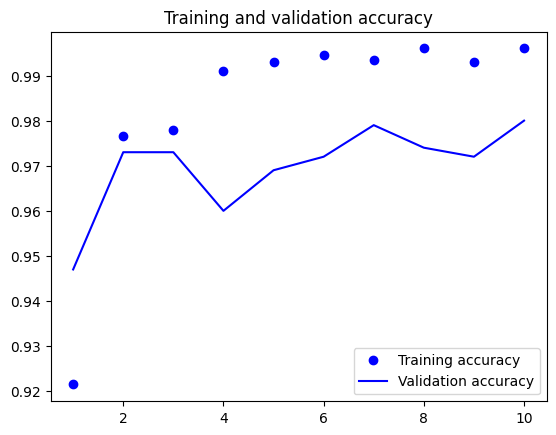

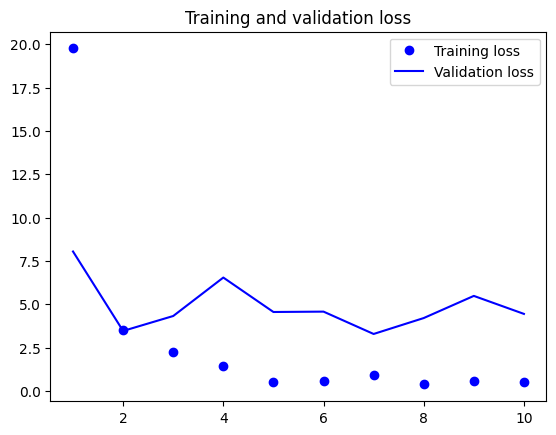

In [83]:
import matplotlib.pyplot as plt
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

#### Feature extraction together with data augmentation

**Instantiating and freezing the VGG16 convolutional base**

In [80]:
conv_base  = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False)
conv_base.trainable = False

**Printing the list of trainable weights before and after freezing**

In [84]:
conv_base.trainable = True
print("This is the number of trainable weights "
      "before freezing the conv base:", len(conv_base.trainable_weights))

This is the number of trainable weights before freezing the conv base: 26


In [85]:
conv_base.trainable = False
print("This is the number of trainable weights "
      "after freezing the conv base:", len(conv_base.trainable_weights))

This is the number of trainable weights after freezing the conv base: 0


**Adding a data augmentation stage and a classifier to the convolutional base**

In [86]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [88]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="feature_extraction_with_data_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=5,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/5
63/63 [==============================] - 121s 2s/step - loss: 6.0185 - accuracy: 0.9505 - val_loss: 4.1806 - val_accuracy: 0.9700
Epoch 2/5
63/63 [==============================] - 138s 2s/step - loss: 4.1549 - accuracy: 0.9585 - val_loss: 3.2307 - val_accuracy: 0.9770
Epoch 3/5
63/63 [==============================] - 140s 2s/step - loss: 3.5651 - accuracy: 0.9650 - val_loss: 3.3765 - val_accuracy: 0.9770
Epoch 4/5
63/63 [==============================] - 134s 2s/step - loss: 3.3673 - accuracy: 0.9730 - val_loss: 4.1130 - val_accuracy: 0.9740
Epoch 5/5
63/63 [==============================] - 137s 2s/step - loss: 3.4819 - accuracy: 0.9735 - val_loss: 4.9956 - val_accuracy: 0.9690


**Evaluating the model on the test set**

In [89]:
test_model = keras.models.load_model(
    "feature_extraction_with_data_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

63/63 [==============================] - 72s 1s/step - loss: 4.9148 - accuracy: 0.9725
Test accuracy: 0.973


### Fine-tuning a pretrained model

In [90]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

**Freezing all layers until the fourth from the last**

In [91]:
conv_base.trainable = True
for layer in conv_base.layers[:-4]:
    layer.trainable = False

**Fine-tuning the model**

In [93]:
model.compile(loss="binary_crossentropy",
              optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="fine_tuning.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=5,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/5
63/63 [==============================] - 200s 3s/step - loss: 2.3257 - accuracy: 0.9785 - val_loss: 3.1329 - val_accuracy: 0.9760
Epoch 2/5
63/63 [==============================] - 179s 3s/step - loss: 1.1596 - accuracy: 0.9820 - val_loss: 2.9372 - val_accuracy: 0.9690
Epoch 3/5
63/63 [==============================] - 181s 3s/step - loss: 0.6078 - accuracy: 0.9895 - val_loss: 2.6044 - val_accuracy: 0.9730
Epoch 4/5
63/63 [==============================] - 190s 3s/step - loss: 0.8845 - accuracy: 0.9855 - val_loss: 1.8268 - val_accuracy: 0.9770
Epoch 5/5
63/63 [==============================] - 188s 3s/step - loss: 0.5541 - accuracy: 0.9915 - val_loss: 1.7265 - val_accuracy: 0.9750


In [94]:
model = keras.models.load_model("fine_tuning.keras")
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

63/63 [==============================] - 103s 2s/step - loss: 2.6707 - accuracy: 0.9735
Test accuracy: 0.974


## Summary